In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def read_outputs(file_dir):
    score = []
    with open (file_dir, "r") as myfile:
        for line in myfile:
#           old output
            s = line.split(":")
            score.append(float(s[1]))
            break
        may_ndcgs = scores[0::5]
        june_ndcgs = scores[2::5]
        july_aucs = scores[4::5]
    return may_ndcgs, june_ndcgs, july_aucs
may_ndcgs, june_ndcgs, july_aucs = read_outputs("/work/data/out/bilstm_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_01_02:39:10")

NameError: name 'scores' is not defined

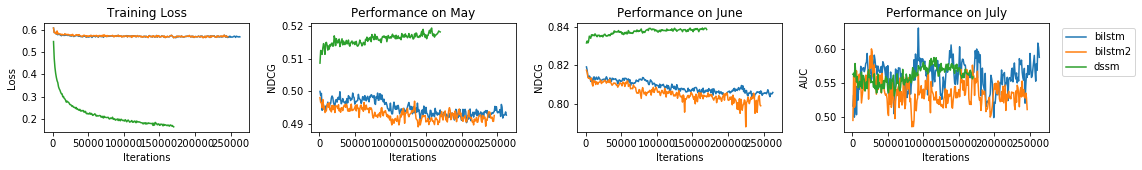

In [80]:

def read_outputs2(file_dir):
    may, june, july, loss, q_rec_loss, d_rec_loss, qd_loss, qd_rec_loss, dq_rec_loss, gan_loss = [], [], [], [], [], [], [], [], [], []
    model_name = ""
    with open (file_dir, "r") as myfile:
        
        for line in myfile:
            s = line.split(",")
            if model_name == "":
                model_name = s[0]
            may.append(float(s[4].split("=")[-1]))
            june.append(float(s[5].split("=")[-1]))
            july.append(float(s[6].split("=")[-1]))
            loss.append(float(s[7].split("=")[-1]))
            
            if "qd" in model_name:
                q_rec_loss.append(float(s[8].split("=")[-1]))
                d_rec_loss.append(float(s[9].split("=")[-1]))
                qd_loss.append(float(s[10].split("=")[-1]))
                
                
            
            
    
            
    return model_name, may, june, july, loss, q_rec_loss, d_rec_loss, qd_loss, qd_rec_loss, dq_rec_loss, gan_loss



def visualise(results, focus=[4,1,2,3], titles=["Training Loss", "Performance on May", "Performance on June", "Performance on July"], ylabels=["Loss", "NDCG", "NDCG", "AUC"]):
    width = 18
    height = 2
    plt.figure(figsize=(width, height))
    
    for i in range(4):
        plt.subplot(1, 4, i+1)
        for r in results:
            plt.plot([(i+1) * 1000 for i in range(len(r[focus[i]]))], r[focus[i]])
        plt.title(titles[i])
        plt.ylabel(ylabels[i])
        plt.xlabel('Iterations')

    
    plt.legend([i[0] for i in results],bbox_to_anchor=(1.04,1), loc="upper left")
    
    plt.subplots_adjust(wspace=0.3)
    plt.show()

run1 = read_outputs2("/work/data/out/bilstm_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_18:20:53")
run2 = read_outputs2("/work/data/out/bilstm2_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_18:50:18")
# run3 = read_outputs2("/work/data/out/kate2_bpe_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:26:38")
run3 = read_outputs2("/work/data/out/dssm_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:30:06")
# run3 = read_outputs2("/work/data/out/")
visualise([run1, run2, run3])


In [31]:
np.mean(run1[3]), np.mean(run2[3])

(0.5603395256916996, 0.5365044117647059)

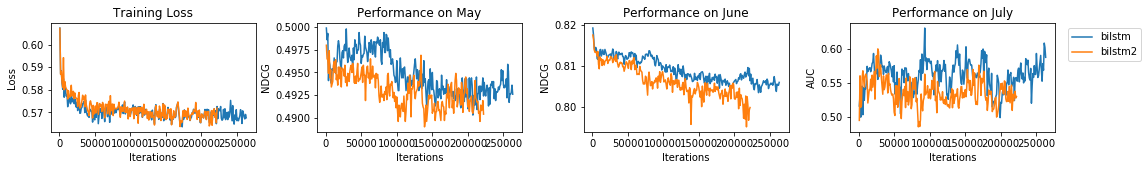

In [55]:
visualise([run1, run2])

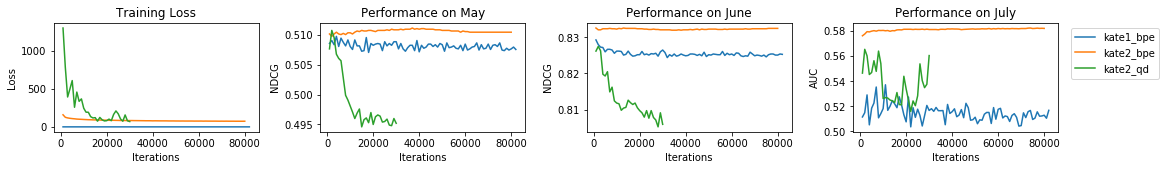

In [73]:
# without weights
run4 = read_outputs2("/work/data/out/kate1_bpe_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:27:00")
run5 = read_outputs2("/work/data/out/kate2_bpe_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:26:38")
run6 = read_outputs2("/work/data/out/kate2_qd_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:28:06")
run7 = read_outputs2("/work/data/out/kate2_qdc_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:30:46")
run8 = read_outputs2("/work/data/out/kate2_qdg1_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:31:51")
# run3 = read_outputs2("/work/data/out/")
# visualise([run1, run2, run3])
visualise([run4, run5, run6])

In [74]:
np.mean(run1[3]), np.mean(run2[3])

(0.5611064638783269, 0.5357621951219511)

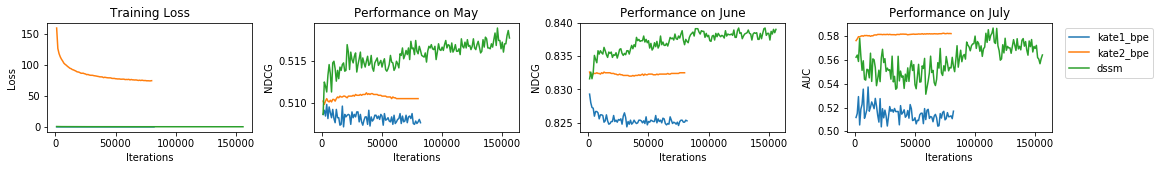

In [75]:
visualise([run4, run5, run3])

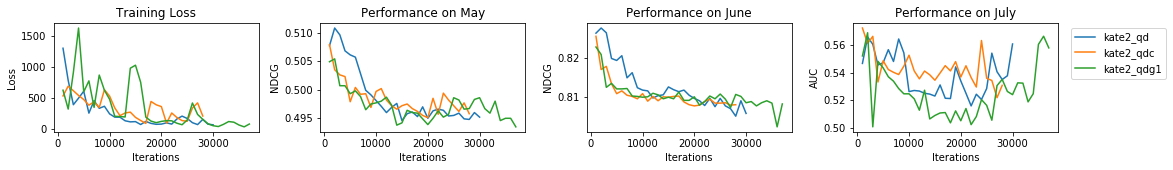

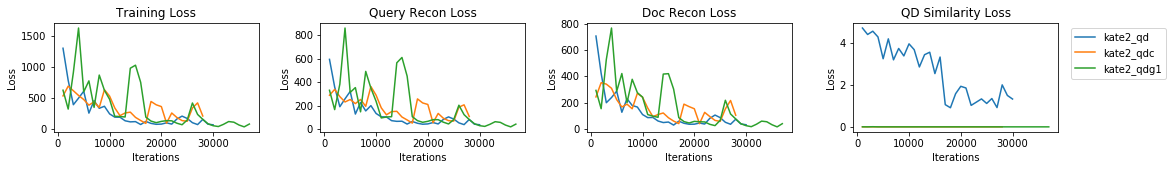

In [77]:
visualise([run6, run7, run8])

visualise([run6, run7, run8], focus=[4,5,6,7], titles=["Training Loss", "Query Recon Loss", "Doc Recon Loss", "QD Similarity Loss"], ylabels=["Loss", "Loss", "Loss", "Loss"])


In [71]:
run9 = read_outputs2("/work/data/out/kate2_qd_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_03_03:33:15")
run10 = read_outputs2("/work/data/out/kate2_qd_h300_l128_n1_ml10_w50509_b32_a0.700000_50K_BPE_30M_QD.txt_2018_07_03_02:11:47")


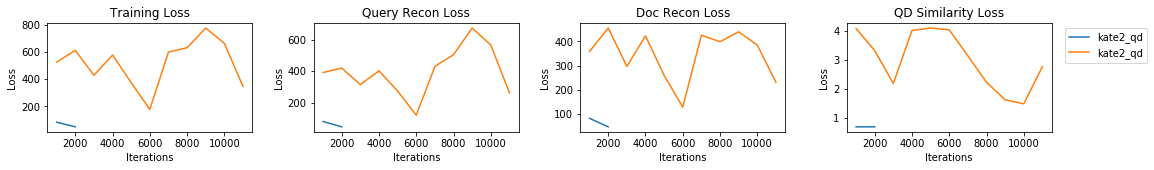

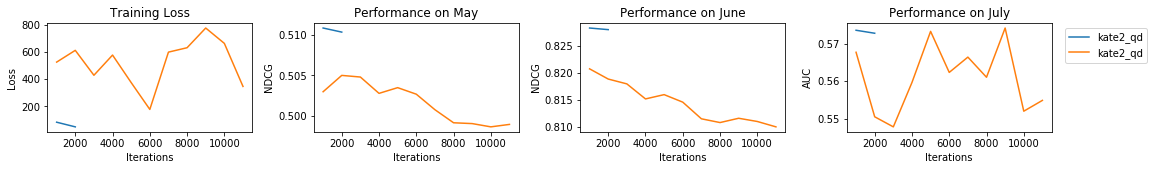

In [72]:
visualise([ run9, run10], focus=[4,5,6,7], titles=["Training Loss", "Query Recon Loss", "Doc Recon Loss", "QD Similarity Loss"], ylabels=["Loss", "Loss", "Loss", "Loss"])
visualise([ run9, run10])

In [81]:
# kate2_bpe
run5[3]

[0.5764,
 0.5778,
 0.5797,
 0.5795,
 0.5801,
 0.5805,
 0.5801,
 0.5807,
 0.5806,
 0.5807,
 0.5804,
 0.5806,
 0.58,
 0.5805,
 0.5804,
 0.5811,
 0.5812,
 0.5811,
 0.5816,
 0.5816,
 0.5816,
 0.5816,
 0.5814,
 0.5816,
 0.5815,
 0.5815,
 0.5817,
 0.5814,
 0.5817,
 0.5814,
 0.5814,
 0.5814,
 0.5814,
 0.5812,
 0.5816,
 0.5816,
 0.5815,
 0.5819,
 0.5818,
 0.5819,
 0.5818,
 0.5818,
 0.5817,
 0.5813,
 0.5815,
 0.5816,
 0.5817,
 0.5818,
 0.5819,
 0.5817,
 0.5818,
 0.5818,
 0.582,
 0.5819,
 0.5819,
 0.5822,
 0.5818,
 0.5821,
 0.5819,
 0.5822,
 0.582,
 0.5822,
 0.582,
 0.5821,
 0.582,
 0.5822,
 0.5821,
 0.5821,
 0.582,
 0.5822,
 0.5822,
 0.5822,
 0.5825,
 0.5826,
 0.5822,
 0.5823,
 0.5825,
 0.5823,
 0.5824,
 0.5823]

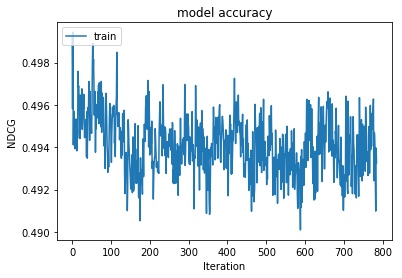

In [11]:
# summarize history for accuracy
plt.plot(may_ndcgs)
# plt.plot(june_ndcgs)
plt.title('model accuracy')
plt.ylabel('NDCG')
plt.xlabel('Iteration')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

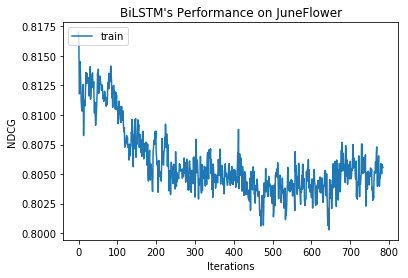

In [14]:
plt.plot(june_ndcgs)
plt.title("BiLSTM's Performance on JuneFlower")
plt.ylabel('NDCG')
plt.xlabel('Iterations')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

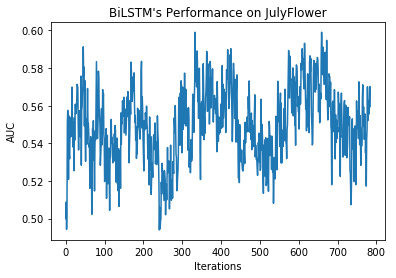

In [16]:
plt.plot(july_aucs)
plt.title("BiLSTM's Performance on JulyFlower")
plt.ylabel('AUC')
plt.xlabel('Iterations')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()